# Скрипт для лемматизации текстов
<b>Автор:</b> Егоров Мичил (тг: @loalkota, email: egorov_michil@mail.ru). 

Пишите идею для улучшения скриптов или сразу создавайте PR :)

Лемматизация - процесс приведения словоформы к лемме — её нормальной (словарной) форме.

- Жизней -> жизни
- Игры -> игра


Проверим работу скрипта на 50 статьях вики

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/wiki.csv', sep='\t')

In [3]:
df.shape

(50, 3)

In [4]:
df.article[0][:2000]

'Игры-викторины\nBrainstorm (настольная игра)Brainstorm () — разновидность игр-викторин.Правила игры.В комплект игры входит:На каждой карточке написана тема и 10 «правильных ответов»: понятий, так или иначе связанных с темой.Темы могут содержать:Ответы «правильные» в кавычках, потому что по-настоящему правильных ответов к каждой теме может быть больше 10.\nНо в игре засчитываются только ответы, указанные на карточке.Играет две команды, состав команд произволен.Право первого хода определяется бросанием кубика.\nВ дальнейшем ходят по очереди.Минималистическая версия.Ведущий (его роль может играть представитель другой команды) зачитывает ходящей команде тему карточки и переворачивает песочные часы.\nВ течение минуты отвечающая команда устраивает «мозговой штурм», выдавая всевозможные ответы, по их мнению, связанные с темой.\nПо окончании минуты за каждый упомянутый «правильный» ответ команде даётся одно очко.Детали реализации.Текст темы карточки напечатан чёрным по белому, а «правильные» 

In [5]:
def is_na(x):
    if isinstance(x, bool):
        return x
    
    return x.any()

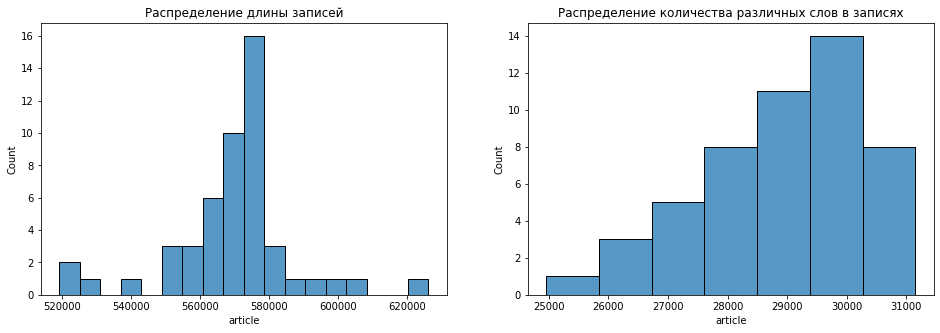

In [6]:
_, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df.article.str.len(), ax=axes.flat[0])
sns.histplot(df.article.str.split().apply(lambda x: set() if is_na(pd.isna(x)) else set(x)).str.len(), ax=axes.flat[1])

axes.flat[0].set_title('Распределение длины записей')
axes.flat[1].set_title('Распределение количества различных слов в записях')

plt.show()

## Лемматизация с кэшированием

Скрипт сначала предобрабатывает текст:
- Удаляет HTML теги
- Убирает ссылки
- Оставляет в текстах только буквы латиницы и кириллицы, числа и точки
- По желанию фильтруются стоп-слова 

Далее находятся уникальные слова и только они нормализуются, что существенно ускоряет процесс лемматизации. Поверх этого, лемматизированные слова сохраняются, что позволяет запоминать леммы и заново их не просчитывать.

In [7]:
from cached_normalizer import CachedNormalizer

In [8]:
cached_normalizer = CachedNormalizer(
    tokenizer=None,  # по умолчанию токенайзер от nltk
    word2norm=None,  # словарь вида {"word1": "norm_form1", "word2": "norm_form2"...}
    remove_stopwords=False,  # нужно ли удалять стоп-слова
    stopwords=None,  # если нужно удалить стоп-слова, то какие (по умолчанию стоп-слова от nltk)
)

Нужно вызвать метод normalize у объектов класса

In [9]:
%%time
norm_sentences = cached_normalizer.normalize(
    df.article,  # текста, которые нужно отнармализовать
    as_sentences=False,  # нужно ли разделить текст по предложениям (например для word2vec)
    except_words=['АД', 'ИМ'],  # какие слова не нужно нормализовать (пример аббревиатуры)
)

Чистка текста:   0%|          | 0/50 [00:00<?, ?it/s]

Лемматизация слов:   0%|          | 0/371089 [00:00<?, ?it/s]

CPU times: user 1min 54s, sys: 1.63 s, total: 1min 55s
Wall time: 1min 54s


In [10]:
norm_sentences[0][:1000]

'игра викторина brainstorm настольный игра brainstorm разновидность игра викторин.править игры.ть комплект игра входить на каждый карточка написать тема и 10 правильный ответ понятие так или иначе связанный с темой.тема мочь содержать ответ правильный в кавычка потому что по настоящий правильный ответ к каждый тема мочь быть большой 10. но в игра засчитываться только ответ указанный на карточке.играть два команда состав команда произволен.право первый ход определяться бросание кубика. в дальнейший ходить по очереди.минималистический версия.ведущий он роль мочь играть представитель другой команда зачитывать ходить команда тема карточка и переворачивать песочный часы. в течение минута отвечать команда устраивать мозговой штурм выдавать всевозможный ответ по они мнение связанный с темой. по окончание минута за каждый упомянуть правильный ответ команда да тся один очко.деталь реализации.текст тема карточка напечатать ч рный по белый а правильный ответ синий по красный муару. прочесть они м

Пример с as_sentences=True

In [11]:
norm_sentences = cached_normalizer.normalize(
    df.article[:1],
    as_sentences=True
)

Чистка текста:   0%|          | 0/1 [00:00<?, ?it/s]

Лемматизация слов:   0%|          | 0/24954 [00:00<?, ?it/s]

In [12]:
norm_sentences[0][:2]

[['игра',
  'викторина',
  'brainstorm',
  'настольный',
  'игра',
  'brainstorm',
  'разновидность',
  'игра',
  'викторин.править',
  'игры.ть',
  'комплект',
  'игра',
  'входить',
  'на',
  'каждый',
  'карточка',
  'написать',
  'тема',
  'и',
  '10',
  'правильный',
  'ответ',
  'понятие',
  'так',
  'или',
  'иначе',
  'связанный',
  'с',
  'темой.тема',
  'мочь',
  'содержать',
  'ответ',
  'правильный',
  'в',
  'кавычка',
  'потому',
  'что',
  'по',
  'настоящий',
  'правильный',
  'ответ',
  'к',
  'каждый',
  'тема',
  'мочь',
  'быть',
  'большой',
  '10.'],
 ['но',
  'в',
  'игра',
  'засчитываться',
  'только',
  'ответ',
  'указанный',
  'на',
  'карточке.играть',
  'два',
  'команда',
  'состав',
  'команда',
  'произволен.право',
  'первый',
  'ход',
  'определяться',
  'бросание',
  'кубика.']]

Можно сохранить объект (словарь нормальных форм) и загрузить уже в другом месте

In [13]:
cached_normalizer.save('wiki_normalization/')

cached_normalizer = CachedNormalizer.load('wiki_normalization/')

Тогда процесс будет быстрее, потому что мы не нормализуем лишний раз

In [14]:
%%time
norm_sentences = cached_normalizer.normalize(df.article)

Чистка текста:   0%|          | 0/50 [00:00<?, ?it/s]

Лемматизация слов:   0%|          | 0/371089 [00:00<?, ?it/s]

CPU times: user 14.4 s, sys: 145 ms, total: 14.6 s
Wall time: 14.5 s


В несколько раз быстрее :)

Можно запустить скрипт на совсем другом корпусе текстов (например на вики). В таком случае словарь будет очень много весить и загружаться, соответственно, дольше. Тем не менее в некоторых моментах это позволит ускорить процесс лемматизации.

In [15]:
%%time
cached_normalizer = CachedNormalizer.load('other_corpus_normalization/')

CPU times: user 18.6 s, sys: 529 ms, total: 19.1 s
Wall time: 19.1 s


In [16]:
%%time
norm_sentences = cached_normalizer.normalize(df.article)

Чистка текста:   0%|          | 0/50 [00:00<?, ?it/s]

Лемматизация слов:   0%|          | 0/371089 [00:00<?, ?it/s]

CPU times: user 1min, sys: 718 ms, total: 1min 1s
Wall time: 1min


Быстрее в два раза, хотя прогонялась на совсем другом тексте